In [10]:
from matplotlib import colors
import numpy as np
from numpy import savetxt
import random
import pickle

from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import csv
from numpy import genfromtxt
from sklearn.manifold import TSNE
import pandas as pd
import random

In [11]:
import colorsys
import random
 
def get_n_hls_colors(num):
    hls_colors = []
    i = 0
    step = 360.0 / num
    while i < 360:
        h = i
        s = 90 + random.random() * 10
        l = 50 + random.random() * 10
        _hlsc = [h / 360.0, l / 100.0, s / 100.0]
        hls_colors.append(_hlsc)
        i += step
 
    return hls_colors
 
def ncolors(num):
    rgb_colors = []
    if num < 1:
        return rgb_colors
    hls_colors = get_n_hls_colors(num)
    for hlsc in hls_colors:
        _r, _g, _b = colorsys.hls_to_rgb(hlsc[0], hlsc[1], hlsc[2])
        r, g, b = [int(x * 255.0) for x in (_r, _g, _b)]
        rgb_colors.append([r, g, b])
 
    return rgb_colors
def color(value):
    digit = list(map(str, range(10))) + list("ABCDEF")
    if isinstance(value, tuple):
        string = '#'
        for i in value:
            a1 = i // 16
            a2 = i % 16
            string += digit[a1] + digit[a2]
        return string
    elif isinstance(value, str):
        a1 = digit.index(value[1]) * 16 + digit.index(value[2])
        a2 = digit.index(value[3]) * 16 + digit.index(value[4])
        a3 = digit.index(value[5]) * 16 + digit.index(value[6])
        return (a1, a2, a3)


(359,)


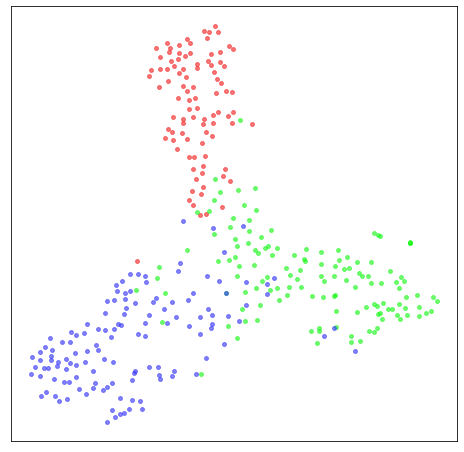

In [12]:
emb1 =pd.read_csv('../embedding/sci-CAR_rna_emb.csv',index_col=0).values
emb2 = pd.read_csv('../embedding/sci-CAR_atac_emb.csv', index_col=0).values

temb1 = TSNE(n_components = 2, learning_rate = 'auto', init = 'random').fit_transform(emb1).T
temb2 = TSNE(n_components = 2, learning_rate = 'auto', init = 'random').fit_transform(emb2).T

#temb1=reducer.fit_transform(emb1).T
#temb2=reducer.fit_transform(emb2).T

#predicted_label.shape
label=pd.read_csv('../data/sci-CAR/label.csv',index_col=0).values.reshape(-1,)
predicted_label=pd.read_csv('../embedding/sci-CAR_label_transferred.csv',index_col=0).values.reshape(-1,)
#print()
split = int(label.shape[0] * 0.8)
label = label[split:]
label = label.astype(np.int64)

predicted_label.shape

num_color=np.unique(label).shape[0]

rgb_list=list(map(lambda x: color(tuple(x)), ncolors(num_color)))


#print("Class number in total is ", np.unique(sample_label).shape)
print(label.shape)
plt.figure(figsize=(8,8))
for i in range(label.max()+1):

    plt.scatter(temb1[0][label[:] == i], temb1[1][label[:] == i],color=rgb_list[i], alpha=0.6, s= 60, marker = ".")
    #plt.scatter(temb2[0][sample_label[:] == i], temb2[1][sample_label[:] == i],color=rgb_list[i], alpha=0.6, s= 25, marker = "s")
#plt.legend(["0 hour","1 hour","3 hour"],loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.xticks([])
plt.yticks([])
plt.savefig('./sci_rna_label' + ".png", dpi=300,bbox_inches='tight')
plt.savefig('./sci_rna_label.svg',dpi=300,bbox_inches='tight')
plt.show()

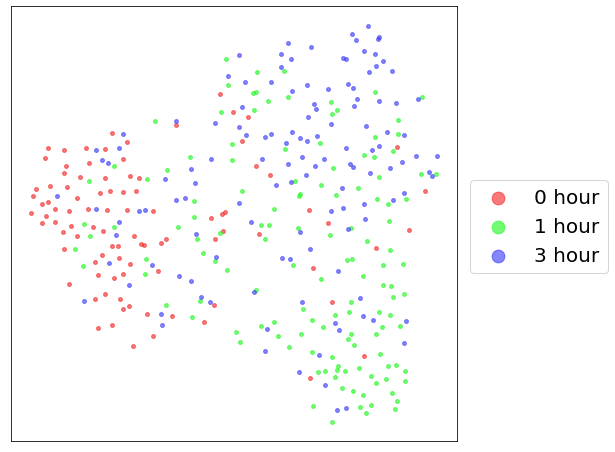

In [13]:
plt.figure(figsize=(8,8))
for i in range(label.max()+1):

    plt.scatter(temb2[0][label[:] == i], temb2[1][label[:] == i],color=rgb_list[i], alpha=0.6, s= 60, marker = ".")
    #plt.scatter(temb2[0][sample_label[:] == i], temb2[1][sample_label[:] == i],color=rgb_list[i], alpha=0.6, s= 25, marker = "s")
#plt.savefig(st +'SHARE_latent' + ".png", dpi=300)
#plt.savefig(st + 'SHARE_latent.svg',dpi=300)

plt.legend(["0 hour","1 hour","3 hour"],loc=2, bbox_to_anchor=(1.03,0.6),borderaxespad = 0.,fontsize=20,markerscale=3.3)
plt.xticks([])
plt.yticks([])
plt.savefig('./sci_atac_label' + ".png", dpi=300,bbox_inches='tight')
plt.savefig('./sci_atac_label.svg',dpi=300,bbox_inches='tight')
plt.show()

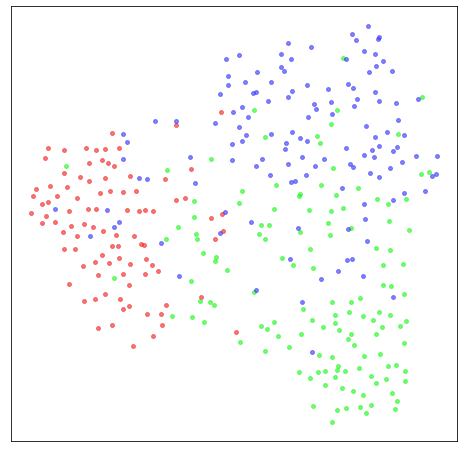

In [14]:
plt.figure(figsize=(8,8))
for i in range(label.max()+1):

    plt.scatter(temb2[0][predicted_label[:] == i], temb2[1][predicted_label[:] == i],color=rgb_list[i], alpha=0.6, s= 60, marker = ".")
    #plt.scatter(temb2[0][sample_label[:] == i], temb2[1][sample_label[:] == i],color=rgb_list[i], alpha=0.6, s= 25, marker = "s")
#plt.savefig(st +'SHARE_latent' + ".png", dpi=300)
#plt.savefig(st + 'SHARE_latent.svg',dpi=300)
plt.xticks([])
plt.yticks([])
plt.savefig('./sci_atac_pred' + ".png", dpi=300,bbox_inches='tight')
plt.savefig('./sci_atac_pred.svg',dpi=300,bbox_inches='tight')
plt.show()